Master Experiment II - Complexity of Neural Network

Chengkai Yang

In [1]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [2]:
class AssociateMemoryNetwork():
    def learn_pattern(self, x):
        self.w = np.matmul(x.T, x) / x.shape[1]

    def recognize(self, x, n_iter):
        for i in range(n_iter):
            x = np.sign(np.dot(self.w, x))
        return x

def compute_similarities(memory, x):
    out = []
    for m in memory:
        out.append(round(np.dot(m, x) / x.shape[0], 4))
    return out

def visualize(images):
    fig, axs = plt.subplots(1, images.shape[0], figsize=(20, 20))
    for i, image in enumerate(images):  
        axs[i].imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

## 4 images 0 ~ 3

In [3]:
# load mnist dataset and transform all values to -1/1
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.astype(np.float32)
train_X[train_X == 0] = -1
train_X[train_X > 0] = 1
test_X = test_X.astype(np.float32)
test_X[test_X == 0] = -1
test_X[test_X > 0] = 1

# select 1 train and test image for each number in [0, n_mumber-1]
n_number = 4
sub_train_X, sub_test_X = np.zeros((n_number, 28, 28)), np.zeros((n_number, 28, 28))
for i in range(n_number):
    sub_train_X[i, :, :] = train_X[train_y == i][0, :, :]
    sub_test_X[i, :, :] = test_X[test_y == i][1, :, :]

# Flatten 2d to 1d
flattened_train_X = sub_train_X.reshape(sub_train_X.shape[0], -1)
flattened_test_X = sub_test_X.reshape(sub_test_X.shape[0], -1)

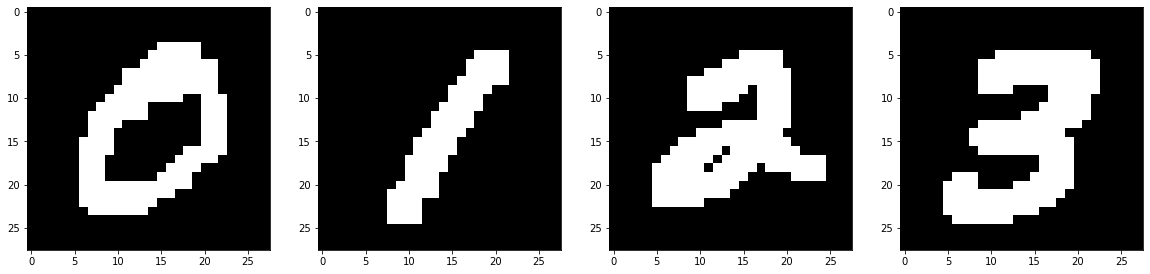

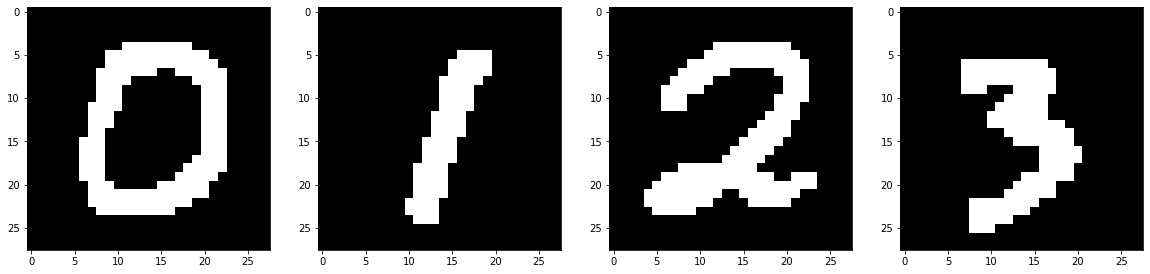

In [4]:
visualize(sub_train_X)
visualize(sub_test_X)

In [5]:
# build associate memory network using training images
amn = AssociateMemoryNetwork()
amn.learn_pattern(flattened_train_X)

[0.8648, 0.676, 0.7526, 0.7474]
[0.676, 0.8648, 0.7577, 0.7423]
[0.6939, 0.699, 0.9235, 0.7245]
[0.699, 0.6939, 0.7347, 0.9133]


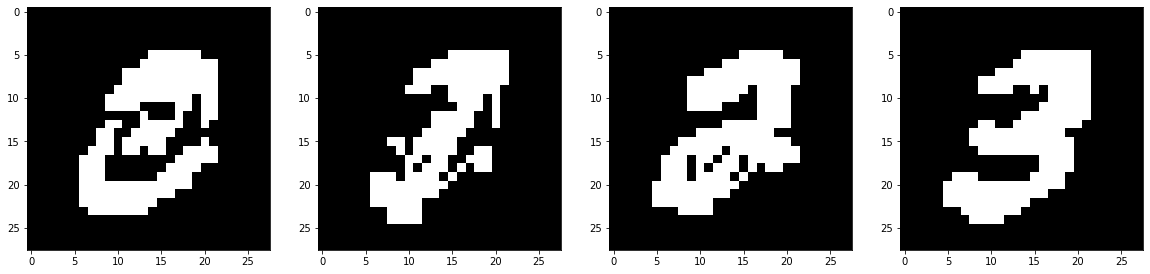

In [7]:
# recognize training images
recognized_images = []
for image in flattened_train_X:
    recognized = amn.recognize(image, n_iter=3)
    print(compute_similarities(flattened_train_X, recognized))
    recognized_images.append(recognized.reshape(28,28))
visualize(np.array(recognized_images))

[0.8648, 0.676, 0.7526, 0.7474]
[0.676, 0.8648, 0.7577, 0.7423]
[0.699, 0.6939, 0.7347, 0.9133]
[0.699, 0.6939, 0.7347, 0.9133]


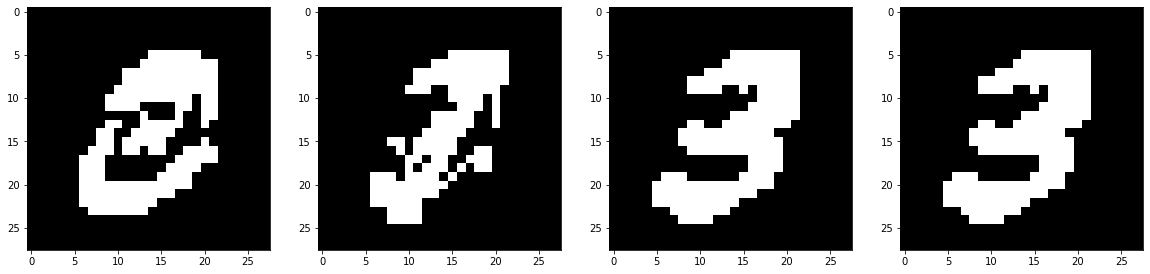

In [8]:
# recognize testing images
recognized_images = []
for image in flattened_test_X:
    recognized = amn.recognize(image, n_iter=3)
    print(compute_similarities(flattened_train_X, recognized))
    recognized_images.append(recognized.reshape(28,28))
visualize(np.array(recognized_images))

## 10 Images 0 ~ 9

In [9]:
def visualize(images):
    fig, axs = plt.subplots(2, 5, figsize=(18, 7))
    # fig.tight_layout()
    for i, image in enumerate(images):  
        ax = axs[i//5][i%5]
        ax.imshow(image, cmap=plt.get_cmap('gray'))
        ax.axis('off')
    fig.subplots_adjust(hspace=0.1)
    plt.show()

In [10]:
# select 1 train and test image for each number in [0, n_mumber-1]
n_number = 10
sub_train_X, sub_test_X = np.zeros((n_number, 28, 28)), np.zeros((n_number, 28, 28))
for i in range(n_number):
    sub_train_X[i, :, :] = train_X[train_y == i][0, :, :]
    sub_test_X[i, :, :] = test_X[test_y == i][1, :, :]

# Flatten 2d to 1d
flattened_train_X = sub_train_X.reshape(sub_train_X.shape[0], -1)
flattened_test_X = sub_test_X.reshape(sub_test_X.shape[0], -1)

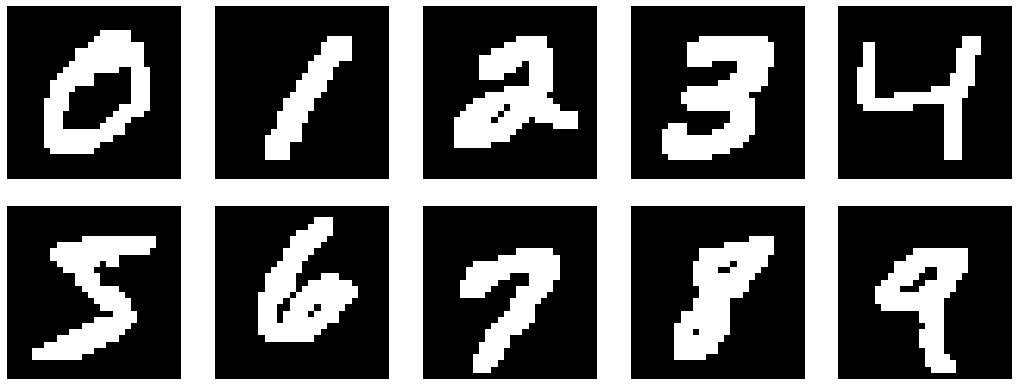

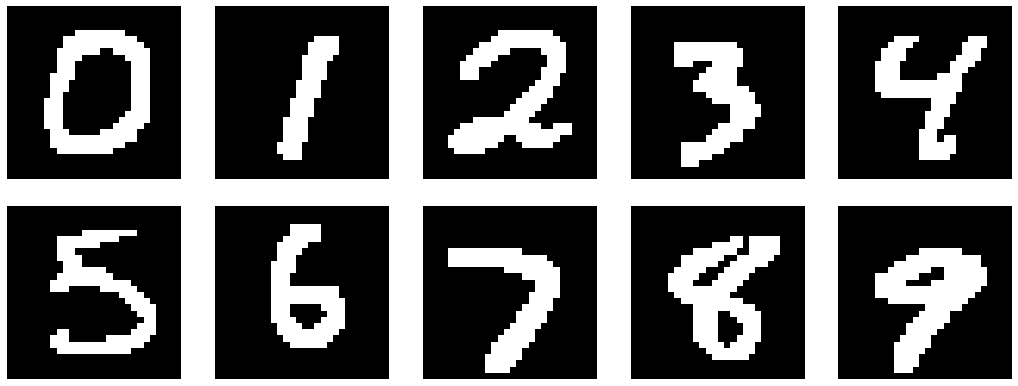

In [11]:
visualize(sub_train_X)
visualize(sub_test_X)

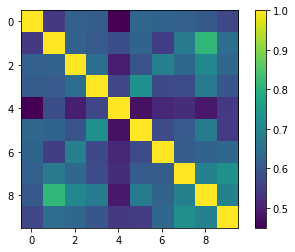

0.6484119999999999

In [12]:
inner_prods = []
for x in flattened_train_X:
    inner_prods.append(compute_similarities(flattened_train_X, x))
plt.imshow(inner_prods, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()
np.average(inner_prods)

[0.6939, 0.75, 0.7806, 0.7653, 0.5306, 0.7347, 0.7194, 0.7653, 0.824, 0.7449]
[0.6607, 0.7781, 0.773, 0.7526, 0.5638, 0.727, 0.6862, 0.7679, 0.8571, 0.7423]
[0.6811, 0.7577, 0.7934, 0.7577, 0.5434, 0.7321, 0.7066, 0.7628, 0.8367, 0.7372]
[0.6862, 0.7526, 0.7883, 0.7628, 0.5383, 0.727, 0.7117, 0.7679, 0.8316, 0.7423]
[0.6684, 0.7704, 0.7806, 0.7449, 0.5561, 0.7194, 0.6939, 0.7755, 0.8495, 0.75]
[0.6735, 0.7653, 0.7857, 0.7653, 0.551, 0.7398, 0.699, 0.7551, 0.8444, 0.7296]
[0.6862, 0.7526, 0.7883, 0.7628, 0.5383, 0.727, 0.7117, 0.7679, 0.8316, 0.7423]
[0.6735, 0.7653, 0.7755, 0.75, 0.551, 0.7143, 0.699, 0.7806, 0.8444, 0.7551]
[0.6607, 0.7781, 0.773, 0.7526, 0.5638, 0.727, 0.6862, 0.7679, 0.8571, 0.7423]
[0.6735, 0.7653, 0.7755, 0.75, 0.551, 0.7143, 0.699, 0.7806, 0.8444, 0.7551]


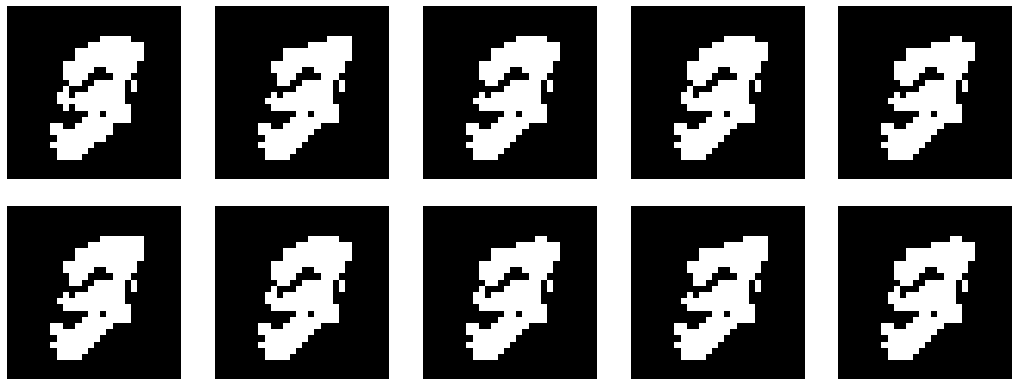

In [13]:
amn = AssociateMemoryNetwork()
amn.learn_pattern(flattened_train_X)

recognized_images = []
for image in flattened_train_X:
    recognized = amn.recognize(image, n_iter=4)
    print(compute_similarities(flattened_train_X, recognized))
    recognized_images.append(recognized.reshape(28,28))
visualize(np.array(recognized_images))